In [137]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import StratifiedShuffleSplit
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.optimizers import Adam
from ipywidgets import widgets
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from io import BytesIO

In [75]:
BASE_DIR = 'dataset/'

ayam_dir = os.path.join(BASE_DIR, 'ayam')
brokoli_dir = os.path.join(BASE_DIR, 'brokoli')
ikan_dir = os.path.join(BASE_DIR, 'ikan')
kambing_dir = os.path.join(BASE_DIR, 'kambing') 
kembang_kol_dir = os.path.join(BASE_DIR, 'kembang kol') 
kentang_dir = os.path.join(BASE_DIR, 'kentang') 
kol_dir = os.path.join(BASE_DIR, 'kol') 
labu_dir = os.path.join(BASE_DIR, 'labu') 
mentimun_dir = os.path.join(BASE_DIR, 'mentimun') 
paprika_dir = os.path.join(BASE_DIR, 'paprika') 
sapi_dir = os.path.join(BASE_DIR, 'sapi') 
telur_dir = os.path.join(BASE_DIR, 'telur') 
tahu_dir = os.path.join(BASE_DIR, 'tahu') 
tempe_dir = os.path.join(BASE_DIR, 'tempe') 
tomat_dir = os.path.join(BASE_DIR, 'tomat') 
udang_dir = os.path.join(BASE_DIR, 'udang') 
wortel_dir = os.path.join(BASE_DIR, 'wortel') 

print(f'total ayam images: {len(os.listdir(ayam_dir))}')
print(f'total brokoli images: {len(os.listdir(brokoli_dir))}')
print(f'total ikan images: {len(os.listdir(ikan_dir))}')
print(f'total kambing images: {len(os.listdir(kambing_dir))}')
print(f'total kembang kol images: {len(os.listdir(kembang_kol_dir))}')
print(f'total kentang images: {len(os.listdir(kentang_dir))}')
print(f'total kol images: {len(os.listdir(kol_dir))}')
print(f'total labu images: {len(os.listdir(labu_dir))}')
print(f'total mentimun images: {len(os.listdir(mentimun_dir))}')
print(f'total paprika images: {len(os.listdir(paprika_dir))}')
print(f'total sapi images: {len(os.listdir(sapi_dir))}')
print(f'total telur images: {len(os.listdir(telur_dir))}')
print(f'total tahu images: {len(os.listdir(tahu_dir))}')
print(f'total tempe images: {len(os.listdir(tempe_dir))}')
print(f'total tomat images: {len(os.listdir(tomat_dir))}')
print(f'total udang images: {len(os.listdir(udang_dir))}')
print(f'total wortel images: {len(os.listdir(wortel_dir))}')


total ayam images: 600
total brokoli images: 600
total ikan images: 600
total kambing images: 600
total kembang kol images: 600
total kentang images: 600
total kol images: 600
total labu images: 600
total mentimun images: 600
total paprika images: 600
total sapi images: 600
total telur images: 600
total tahu images: 600
total tempe images: 600
total tomat images: 600
total udang images: 600
total wortel images: 600


In [ ]:
def rename_images_in_folder(dataset_dir):
    """
    Melakukan rename semua file gambar di dalam dataset folder dan subfoldernya 
    menjadi berekstensi .png.
    """
    # Looping melalui semua folder di dalam dataset
    for label_folder in os.listdir(dataset_dir):
        label_folder_path = os.path.join(dataset_dir, label_folder)
        
        # Pastikan hanya memproses folder
        if not os.path.isdir(label_folder_path):
            continue
        
        # Looping melalui setiap file di dalam subfolder
        for image_name in os.listdir(label_folder_path):
            image_path = os.path.join(label_folder_path, image_name)
            
            # Pastikan hanya memproses file
            if os.path.isfile(image_path):
                rename_image_to_png(image_path)

def rename_image_to_png(image_path):
    """
    Mengubah ekstensi file gambar menjadi .png dengan melakukan rename.
    """
    # Ambil nama file dan ekstensinya
    file_name, file_extension = os.path.splitext(image_path)
    
    # Cek apakah file sudah berformat .png
    if file_extension.lower() == '.png':
        print(f"{image_path} is already a .png file. No renaming required.")
        return
    
    # Buat nama file baru dengan ekstensi .png
    new_image_path = file_name + '.png'
    
    try:
        # Rename file
        os.rename(image_path, new_image_path)
        print(f"Renamed {image_path} to {new_image_path}")
    except Exception as e:
        print(f"Error renaming {image_path}: {e}")

rename_images_in_folder(BASE_DIR)


Renamed dataset/ayam\ayam0.jpg to dataset/ayam\ayam0.png
Renamed dataset/ayam\ayam1.jpg to dataset/ayam\ayam1.png
Renamed dataset/ayam\ayam10.jpg to dataset/ayam\ayam10.png
Renamed dataset/ayam\ayam100.jpg to dataset/ayam\ayam100.png
dataset/ayam\ayam101.png is already a .png file. No renaming required.
Renamed dataset/ayam\ayam102.jpg to dataset/ayam\ayam102.png
dataset/ayam\ayam103.png is already a .png file. No renaming required.
Renamed dataset/ayam\ayam104.jpeg to dataset/ayam\ayam104.png
dataset/ayam\ayam105.png is already a .png file. No renaming required.
dataset/ayam\ayam106.png is already a .png file. No renaming required.
dataset/ayam\ayam107.png is already a .png file. No renaming required.
dataset/ayam\ayam108.png is already a .png file. No renaming required.
dataset/ayam\ayam109.png is already a .png file. No renaming required.
Renamed dataset/ayam\ayam11.jpeg to dataset/ayam\ayam11.png
dataset/ayam\ayam110.png is already a .png file. No renaming required.
dataset/ayam\ay

In [80]:
dataset_path = 'dataset/'

# Lists to store data
file_names = []
labels = []
full_paths = []

# Traverse the dataset directory
for class_folder in sorted(os.listdir(dataset_path)):
    class_folder_path = os.path.join(dataset_path, class_folder)
    if os.path.isdir(class_folder_path):  # Check if it's a directory
        for image_file in os.listdir(class_folder_path):
            full_paths.append(os.path.join(class_folder_path, image_file))
            file_names.append(image_file)
            labels.append(class_folder)  # Use folder name as class label


In [81]:
print(len(file_names))  # Length of file_names
print(len(labels))      # Length of labels
print(len(full_paths))  # Length of full_paths


10200
10200
10200


In [97]:
df = pd.DataFrame({
    "FileName": file_names,
    "ClassLabel": labels,
    "FullPath": full_paths
})
print(df.head())  # Display the first few rows


      FileName ClassLabel                  FullPath
0    ayam0.png       ayam    dataset/ayam\ayam0.png
1    ayam1.png       ayam    dataset/ayam\ayam1.png
2   ayam10.png       ayam   dataset/ayam\ayam10.png
3  ayam100.png       ayam  dataset/ayam\ayam100.png
4  ayam101.png       ayam  dataset/ayam\ayam101.png


In [98]:
x = df['FullPath'].values
y = df['ClassLabel'].values

# x adalah gambar dan y adalah label
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=300)

# Pertama, bagi data menjadi train dan temp (yang akan dibagi lagi menjadi validasi dan testing)
for train_index, temp_index in sss.split(x, y):
    X_train, X_temp = x[train_index], x[temp_index]
    y_train, y_temp = y[train_index], y[temp_index]

# Kedua, bagi temp menjadi validation dan testing
sss_temp = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=300)
for val_index, test_index in sss_temp.split(X_temp, y_temp):
    X_val, X_test = X_temp[val_index], X_temp[test_index]
    y_val, y_test = y_temp[val_index], y_temp[test_index]


In [99]:
print(f"Training size: {len(X_train)}")
print(f"Validation size: {len(X_val)}")
print(f"Test size: {len(X_test)}")

Training size: 7140
Validation size: 1530
Test size: 1530


In [184]:
DIMENSION = (224, 224, 3)
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCH = 15
NUM_CLASSES = 17

## Preprocessing

In [185]:
def ImagePreprocess1(path):
    # Load the image 
    image = cv2.imread(path) 
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img_resize = cv2.resize(img_rgb, IMG_SIZE)

    # Create the sharpening kernel 
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]) 

    # Sharpen the image 
    sharpened_image = cv2.filter2D(img_resize, -1, kernel) 
    return sharpened_image

In [186]:
preprocessed_img_train = [ImagePreprocess1(path) for path in X_train]
X_train_preprocessed = np.array(preprocessed_img_train, dtype=np.float32)

preprocessed_img_val = [ImagePreprocess1(path) for path in X_val]
X_val_preprocessed = np.array(preprocessed_img_val, dtype=np.float32)

preprocessed_img_test = [ImagePreprocess1(path) for path in X_test]
X_test_preprocessed = np.array(preprocessed_img_test, dtype=np.float32)

In [190]:
def changeLabel(name):
    if name == "ayam":
        return 0
    elif name == "brokoli":
        return 1
    elif name == "ikan":
        return 2
    elif name == "kambing":
        return 3
    elif name == "kembang kol":
        return 4
    elif name == "kentang":
        return 5
    elif name == "kol":
        return 6
    elif name == "labu":
        return 7
    elif name == "mentimun":
        return 8
    elif name == "paprika":
        return 9
    elif name == "sapi":
        return 10
    elif name == "tahu":
        return 11
    elif name == "telur":
        return 12
    elif name == "tempe":
        return 13
    elif name == "tomat":
        return 14
    elif name == "udang":
        return 15
    elif name == "wortel":
        return 16


In [191]:
train_labels = np.array([changeLabel(i) for i in y_train], dtype=np.float32)
val_labels = np.array([changeLabel(j) for j in y_val], dtype=np.float32)
test_labels = np.array([changeLabel(k) for k in y_test], dtype=np.float32)
y_train_one_hot = to_categorical(train_labels, num_classes=17)
y_val_one_hot = to_categorical(val_labels, num_classes=17)
y_test_one_hot = to_categorical(test_labels, num_classes=17)

In [192]:
train_labels

array([14.,  4.,  2., ...,  9.,  2., 10.], dtype=float32)

In [193]:
validation_img = (np.array(preprocessed_img_val), y_val_one_hot)

In [194]:
# Define fill mode.
FILL_MODE = 'nearest'

# Create the augmentation model.
data_augmentation = tf.keras.Sequential([
    # Add the augmentation layers
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2, fill_mode=FILL_MODE),
    tf.keras.layers.RandomZoom(0.2, fill_mode=FILL_MODE),
    tf.keras.layers.RandomTranslation(0.2, 0.2, fill_mode=FILL_MODE),
    ])

# Build the Model

In [195]:
base_model = tf.keras.applications.InceptionV3(
    include_top=False,
    weights='imagenet',
    classifier_activation='softmax'
)
# Fine-tuning: Freeze the first 30 layers, allow the rest to train
for layer in base_model.layers[:30]:
    layer.trainable = False

In [196]:
model = Sequential([
    tf.keras.layers.Input(shape=DIMENSION),
    data_augmentation,
    tf.keras.layers.Lambda(preprocess_input),
    base_model,
    GlobalAveragePooling2D(),
    Flatten(),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(NUM_CLASSES, activation="softmax")
])


In [197]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_22 (Sequential)  (None, 224, 224, 3)       0         
                                                                 
 lambda_12 (Lambda)          (None, 224, 224, 3)       0         
                                                                 
 inception_v3 (Functional)   (None, None, None, 2048   21802784  
                             )                                   
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
 8 (GlobalAveragePooling2D)                                      
                                                                 
 flatten_6 (Flatten)         (None, 2048)              0         
                                                                 
 batch_normalization_676 (B  (None, 2048)            

In [198]:
# Define the checkpoint path
os.makedirs('saved_models_v4', exist_ok=True)
checkpoint_path = 'saved_models_v4_image_1/weights-improvment-{epoch:02d}-{loss:.2f}.keras'

# Create a callback to save model checkpoints
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    save_weights_only=False,    
    monitor='val_loss',        
    save_best_only=True,       
    verbose=1                  
)
latest_checkpoint = tf.train.latest_checkpoint(checkpoint_path)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [199]:
# Set the training parameters
model.compile(loss = 'categorical_crossentropy', optimizer=Adam(1e-4), metrics=['accuracy'])

In [200]:
# Train the model
history = model.fit(
    X_train_preprocessed,
    y_train_one_hot,
    epochs=EPOCH,
    validation_data = (X_val_preprocessed, y_val_one_hot),
    verbose = 1, 
    callbacks=[checkpoint_callback, early_stopping]
)

Epoch 1/15
224/224 [==============================] - ETA: 0s - loss: 8.9616 - accuracy: 0.6894
Epoch 1: val_loss improved from inf to 7.76685, saving model to saved_models_v4_image_1\weights-improvment-01-8.96.keras
224/224 [==============================] - 373s 2s/step - loss: 8.9616 - accuracy: 0.6894 - val_loss: 7.7669 - val_accuracy: 0.8804
Epoch 2/15
224/224 [==============================] - ETA: 0s - loss: 7.3874 - accuracy: 0.8685
Epoch 2: val_loss improved from 7.76685 to 6.74632, saving model to saved_models_v4_image_1\weights-improvment-02-7.39.keras
224/224 [==============================] - 345s 2s/step - loss: 7.3874 - accuracy: 0.8685 - val_loss: 6.7463 - val_accuracy: 0.9124
Epoch 3/15
224/224 [==============================] - ETA: 0s - loss: 6.3131 - accuracy: 0.9062
Epoch 3: val_loss improved from 6.74632 to 5.78039, saving model to saved_models_v4_image_1\weights-improvment-03-6.31.keras
224/224 [==============================] - 342s 2s/step - loss: 6.3131 - accu

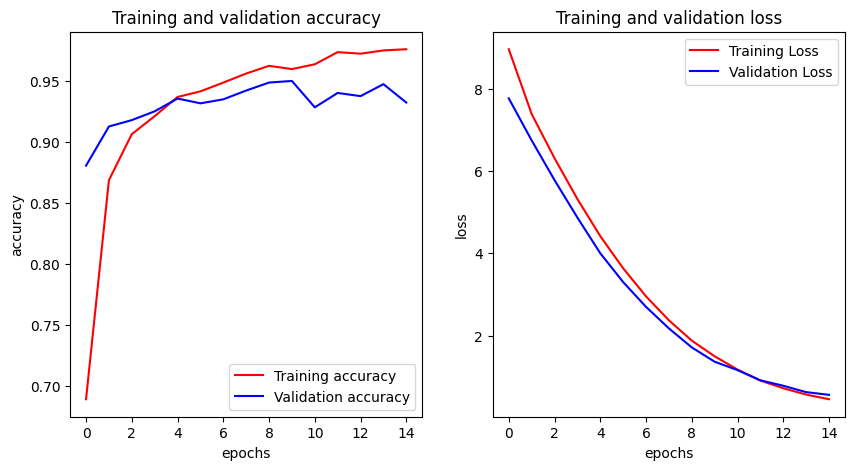

In [201]:
def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  fig, ax = plt.subplots(1,2, figsize=(10, 5))
  ax[0].plot(epochs, acc, 'r', label='Training accuracy')
  ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
  ax[0].set_title('Training and validation accuracy')
  ax[0].set_xlabel('epochs')
  ax[0].set_ylabel('accuracy')
  ax[0].legend()

  ax[1].plot(epochs, loss, 'r', label='Training Loss')
  ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
  ax[1].set_title('Training and validation loss')
  ax[1].set_xlabel('epochs')
  ax[1].set_ylabel('loss')
  ax[1].legend()

  plt.show()

plot_loss_acc(history)

In [202]:
model.save("models/model_v4(5).keras")

In [205]:
model = load_model("models/model_v4(5).keras", safe_mode=False)

In [206]:
y_pred = model.predict(X_test_preprocessed)

48/48 [==============================] - 23s 455ms/step


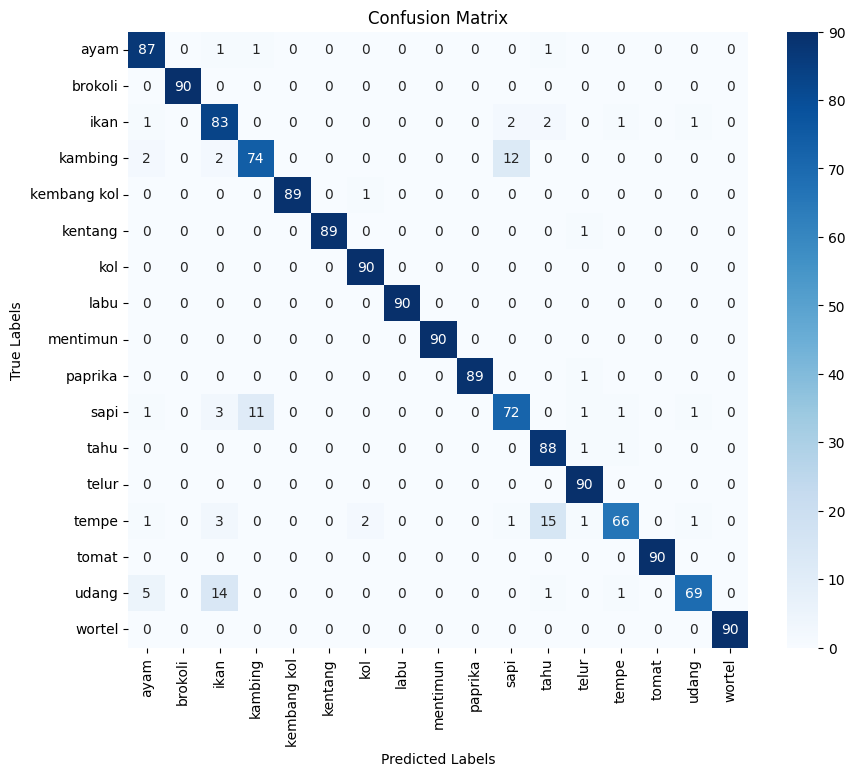

In [207]:
classes = ["ayam", "brokoli", "ikan", "kambing", "kembang kol", "kentang", "kol", "labu", "mentimun", "paprika", "sapi", "tahu", "telur", "tempe", "tomat", "udang", "wortel"] 

y_true = np.argmax(y_test_one_hot, axis=1)  # Ubah one-hot ke label numerik
y_pred = np.argmax(y_pred, axis=1)     # Ubah probabilitas ke label numerik

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [208]:
# Hitung laporan metrik evaluasi
report = classification_report(y_true, y_pred, target_names=classes)

print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

        ayam       0.90      0.97      0.93        90
     brokoli       1.00      1.00      1.00        90
        ikan       0.78      0.92      0.85        90
     kambing       0.86      0.82      0.84        90
 kembang kol       1.00      0.99      0.99        90
     kentang       1.00      0.99      0.99        90
         kol       0.97      1.00      0.98        90
        labu       1.00      1.00      1.00        90
    mentimun       1.00      1.00      1.00        90
     paprika       1.00      0.99      0.99        90
        sapi       0.83      0.80      0.81        90
        tahu       0.82      0.98      0.89        90
       telur       0.95      1.00      0.97        90
       tempe       0.94      0.73      0.82        90
       tomat       1.00      1.00      1.00        90
       udang       0.96      0.77      0.85        90
      wortel       1.00      1.00      1.00        90

  

In [209]:
correct = np.sum(y_true == y_pred)  # Hitung jumlah prediksi benar
accuracy = correct / len(y_true)   # Hitung akurasi
print(f"Akurasi: {accuracy:.2%}")

Akurasi: 93.86%


In [210]:
# Create the widget and take care of the display
uploader = widgets.FileUpload(accept="image/*", multiple=True)
display(uploader)
out = widgets.Output()
display(out)

def file_predict(filename, file, out):
    """ A function for creating the prediction and printing the output."""
    image = tf.keras.utils.load_img(file, target_size=(200, 200))
    image = tf.keras.utils.img_to_array(image)
    image = np.expand_dims(image, axis=0)

    prediction = model.predict(image, verbose=0)[0]

    with out:

        print(f'\nmodel output: {prediction}')
        
        prediction_index = np.argmax(prediction)
        
        classes = ["ayam", "brokoli", "ikan", "kambing", "kembang kol", "kentang", "kol", "labu", "mentimun", "paprika", "sapi", "tahu", "telur", "tempe", "tomat", "udang", "wortel"]
        
        predicted_class = classes[prediction_index]
        
        print(f'{filename} is {predicted_class}')


def on_upload_change(change):
    """ A function for geting files from the widget and running the prediction."""
    # Get the newly uploaded file(s)
    
    items = change.new
    for item in items: # Loop if there is more than one file uploaded  
        file_jpgdata = BytesIO(item.content)
        file_predict(item.name, file_jpgdata, out)


uploader.observe(on_upload_change, names='value')

FileUpload(value=(), accept='image/*', description='Upload', multiple=True)

Output()

In [214]:
classes = ["ayam", "brokoli", "ikan", "kambing", "kembang kol", "kentang", "kol", "labu", "mentimun", "paprika", "sapi", "tahu", "telur", "tempe", "tomat", "udang", "wortel"] 

y_true = np.argmax(y_test_one_hot)  # Ubah one-hot ke label numerik
y_pred = np.argmax(y_pred, axis=1)     # Ubah probabilitas ke label numerik

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


AxisError: axis 1 is out of bounds for array of dimension 1